## Gaussian Naïve Bayes Classifier on MNIST

In [1]:
import pandas as pd
import numpy as np

### Read in the data and preprocess (normalise)

In [2]:
# Read the data in
training_data = pd.read_csv('./data/mnist_train.csv')
testing_data = pd.read_csv('./data/mnist_test.csv')

# Extract the X and y training data and normalise.
X_train = training_data[training_data.columns[1:]].values/255
X_test = testing_data[testing_data.columns[1:]].values/255

y_train = training_data['5'].values
y_test = testing_data['7'].values

### Train a Gaussian Naïve Bayes classifier on the data

In [3]:
from naive_bayes import GaussianNaiveBayes

gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

predictions, _ = gnb.predict(X_test)
acc = gnb.accuracy(y_test, predictions)

print("Test Accuracy: %.2f" % acc)

predictions, _ = gnb.predict(X_train)
acc = gnb.accuracy(y_train, predictions)

print("Train Accuracy: %.2f" % acc)

Test Accuracy: 0.46
Train Accuracy: 0.47


### Plot the mean and standard deviation for each class

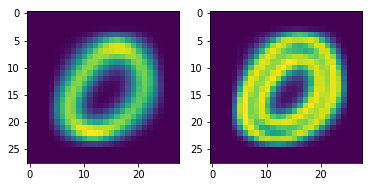

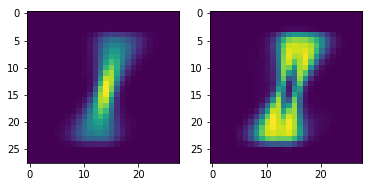

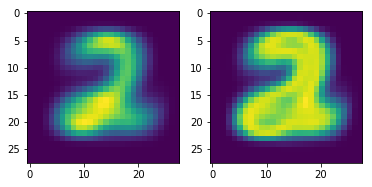

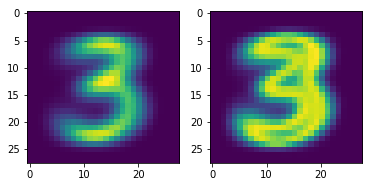

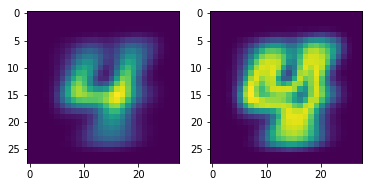

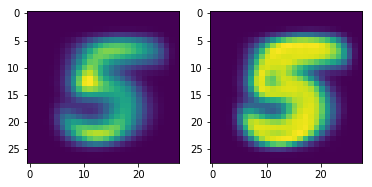

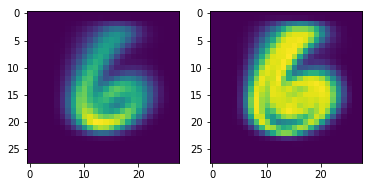

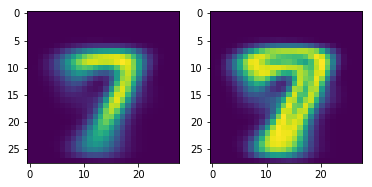

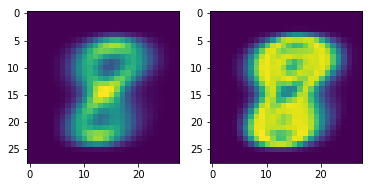

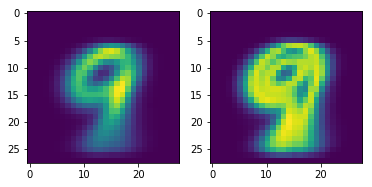

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

for c in range(10):
    fig, ax = plt.subplots(1, 2)
    img_mu = gnb.mu[c].reshape(-1, 28)
    img_std = gnb.std[c].reshape(-1, 28)
    
    ax[0].imshow(img_mu)
    ax[1].imshow(img_std)

    plt.show()

### Transform the pixels to either 'on' or 'off' instead of having grayscale values

In [5]:
# Extract the X and y training data and normalise.
X_train[X_train > 0] = 1
X_train[X_train == 0] = 0

X_test[X_test > 0] = 1
X_test[X_test == 0] = 0

In [6]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

predictions, _ = gnb.predict(X_test)
acc = gnb.accuracy(y_test, predictions)

print("Test Accuracy: %.2f" % acc)

predictions, _ = gnb.predict(X_train)
acc = gnb.accuracy(y_train, predictions)

print("Train Accuracy: %.2f" % acc)

Test Accuracy: 0.74
Train Accuracy: 0.74


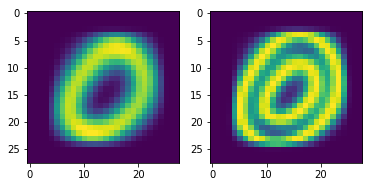

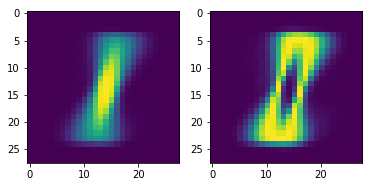

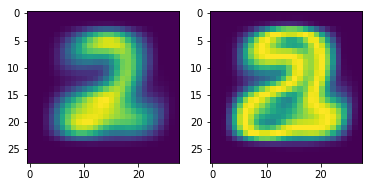

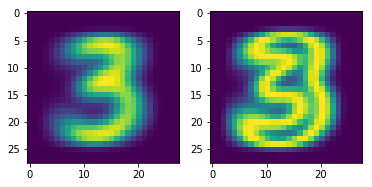

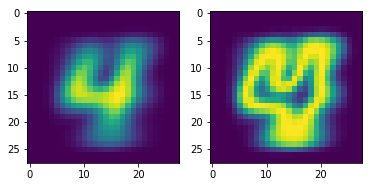

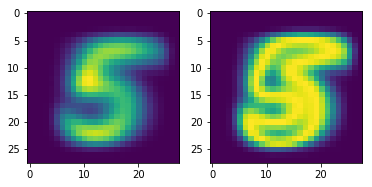

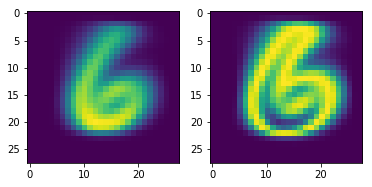

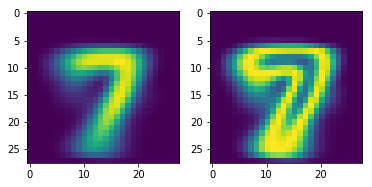

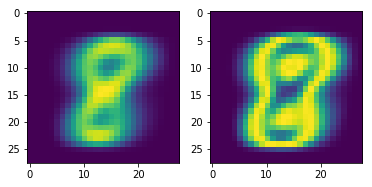

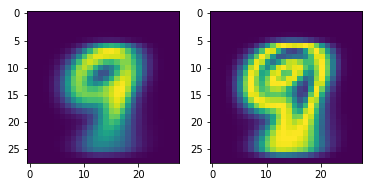

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

for c in range(10):
    fig, ax = plt.subplots(1, 2)
    img_mu = gnb.mu[c].reshape(-1, 28)
    img_std = gnb.std[c].reshape(-1, 28)
    
    ax[0].imshow(img_mu)
    ax[1].imshow(img_std)

    plt.show()

#### It can be seen that the accuracy achieved by this model on MNIST is around ~75% -- which is considered pretty low for this dataset. There are a few possible reasons for this: 
- Naïve Bayes has a low-variance and may underfit with a complicated dataset such as handwritten digits.
- The independence assumption on the pixels is too strong, considering that pixels in images are known to be highly correlated.
    
    